In [1]:
import geopandas as gpd
import zipfile
import os
import fiona
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Patch, PathPatch
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import random
import rasterio
from rasterstats import zonal_stats
import numpy as np

In [ ]:
# Extract the zip file
#with zipfile.ZipFile('PV_Low_Exc.zip', 'r') as zip_ref:
#    zip_ref.extractall('PV_Low_Exc')

In [ ]:
# Find the .shp file in the extracted directory
#for file in os.listdir('PV_Low_Exc'):
#    if file.endswith(".shp"):
#        shapefile = os.path.join('PV_Low_Exc', file)

In [ ]:
# Load the shapefile using GeoPandas
#gdf = gpd.read_file(shapefile)

# Print the first 5 rows of the GeoDataFrame
#print(gdf.head())

In [6]:
gdb_path = '0000_25833_ar50_gdb.gdb'
# List all layers in the GDB
layers = fiona.listlayers(gdb_path)
for layer in layers:
    print(layer)

org_ar_ar50_flate


In [7]:
# Replace 'landscape' with the actual name of the layer you're interested in
layer_name = 'org_ar_ar50_flate'

# Read the layer into a GeoDataFrame
gdf = gpd.read_file(gdb_path, layer=layer_name)

In [8]:
gdf

,artype,arskogbon,artreslag,arjordbr,arveget,areal,arkartstd,kilde,geometry
0,50,98,39,98,99,1.188990e+04,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((-40290.000 6524970.000, -40290..."
1,99,98,98,98,98,6.961873e+09,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((0.000 6980300.000, 0.000 69802..."
2,82,98,98,98,98,2.572468e+09,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((-20480.000 6901090.000, -20487..."
3,50,98,39,98,55,1.165619e+05,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((-39570.000 6877420.000, -39570..."
4,50,98,39,98,51,2.457512e+04,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((-39930.000 6880690.000, -39930..."
...,...,...,...,...,...,...,...,...,...
1896559,30,12,31,98,98,3.988261e+06,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((271350.000 6803450.000, 271350..."
1896560,30,11,31,98,98,3.218883e+06,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((99160.000 6615520.000, 99167.5..."
1896561,50,98,39,98,54,2.703485e+06,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((298860.000 6894000.000, 298840..."
1896562,50,98,39,98,55,2.633873e+06,AR50,AR50 fra AR5 årsversjon 2021. ARFJELL2 og N50 ...,"MULTIPOLYGON (((141880.000 7000000.000, 141872..."


In [9]:
gdf['artype'].unique()

array([50, 99, 82, 30, 20, 60, 81, 10, 70])

In [ ]:
#gdf.plot()

In [4]:
gdb_path_250 = '/fp/homes01/u01/ec-javedm/ec85/models/shahzad/geonorge/0000_ar250_25833_gdb.gdb'
# List all layers in the GDB
layers_250 = fiona.listlayers(gdb_path_250)
for layer in layers_250:
    print(layer)

ar250_flate


In [5]:
# Replace 'landscape' with the actual name of the layer you're interested in
layer_name_250 = 'ar250_flate'

# Read the layer into a GeoDataFrame
gdf_250 = gpd.read_file(gdb_path_250, layer=layer_name_250)

In [6]:
gdf_250

,objtype,artype,arskogbon,artreslag,arveget,arjordbr,ardyrking,arkartstd,målemetode,informasjon,oppdateringsdato,originaldatavert,navnerom,kopidato,områdeid,lokalid,fylkeid,komid,geometry
0,arealressursflate,82,98,98,98,None,98,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4205,289788,42,4205,"MULTIPOLYGON (((62875.009 6453224.995, 62811.1..."
1,arealressursflate,99,98,98,98,None,98,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4205,289789,42,4205,"MULTIPOLYGON (((21146.971 6433670.744, 21462.7..."
2,arealressursflate,99,98,98,98,None,98,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4225,290376,42,4225,"MULTIPOLYGON (((21146.360 6433668.931, 20724.1..."
3,arealressursflate,82,98,98,98,None,98,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4225,290372,42,4225,"MULTIPOLYGON (((31325.011 6462474.994, 31387.7..."
4,arealressursflate,99,98,98,98,None,98,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4225,290375,42,4225,"MULTIPOLYGON (((19789.803 6434149.174, 19781.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591636,arealressursflate,50,98,39,51,None,99,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5439,549372,54,5439,"MULTIPOLYGON (((957200.178 7937039.238, 957174..."
591637,arealressursflate,60,11,39,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5439,549371,54,5439,"MULTIPOLYGON (((975662.690 7938065.492, 975857..."
591638,arealressursflate,60,11,39,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5439,549370,54,5439,"MULTIPOLYGON (((974686.747 7937287.540, 974674..."
591639,arealressursflate,50,98,39,52,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5439,549365,54,5439,"MULTIPOLYGON (((973013.619 7938129.986, 973037..."


In [7]:
gdf_250['artype'].unique()

array(['82', '99', '30', '20', '10', '50', '81', '60', '70'], dtype=object)

In [8]:
# Filter for forest and agriculture
gdf_forest_agri = gdf_250[gdf_250['artype'].isin(['20', '30'])]


In [11]:
# Filter for forest and agriculture and developed land (houses+industry+parks+cities)
gdf_forest_agri_developedland = gdf_250[gdf_250['artype'].isin(['10', '20', '30'])]

In [9]:
gdf_forest_agri

,objtype,artype,arskogbon,artreslag,arveget,arjordbr,ardyrking,arkartstd,målemetode,informasjon,oppdateringsdato,originaldatavert,navnerom,kopidato,områdeid,lokalid,fylkeid,komid,geometry
5,arealressursflate,30,17,33,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4225,291306,42,4225,"MULTIPOLYGON (((37242.899 6463691.306, 37167.2..."
6,arealressursflate,30,17,33,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4205,289585,42,4205,"MULTIPOLYGON (((37242.918 6463691.302, 37522.1..."
7,arealressursflate,20,98,98,98,None,98,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4225,291295,42,4225,"MULTIPOLYGON (((37275.011 6464024.994, 37375.0..."
10,arealressursflate,30,17,32,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4205,289676,42,4205,"MULTIPOLYGON (((33950.011 6458724.994, 33883.4..."
12,arealressursflate,30,17,31,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,4225,291296,42,4225,"MULTIPOLYGON (((37450.011 6464324.994, 37356.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591160,arealressursflate,30,99,99,98,None,99,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5439,549188,54,5439,"MULTIPOLYGON (((964587.307 7896914.835, 964612..."
591175,arealressursflate,30,11,32,98,None,81,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5440,538159,54,5440,"MULTIPOLYGON (((1019984.812 7896810.506, 10201..."
591223,arealressursflate,30,99,99,98,None,99,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5438,550918,54,5438,"MULTIPOLYGON (((945437.711 7898636.895, 945384..."
591242,arealressursflate,30,99,99,98,None,99,AR250,64,Generalisert fra AR5 Årsversjon 2016,20180106,NIBIO,NO_NIBIO_AR250_2019_2,20191206,5438,549595,54,5438,"MULTIPOLYGON (((944913.618 7899963.755, 945083..."


In [33]:
area_by_fylke = gdf_250.to_crs(epsg=3035).dissolve(by='fylkeid', aggfunc='sum')['geometry'].area
area_by_fylke

/tmp/ipykernel_773522/1035145591.py:1: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  area_by_fylke = gdf_250.to_crs(epsg=3035).dissolve(by='fylkeid', aggfunc='sum')['geometry'].area


fylkeid
3     4.807548e+08
11    1.653218e+10
15    2.546814e+10
18    8.055730e+10
30    2.581037e+10
34    5.207245e+10
38    2.019927e+10
42    2.297323e+10
46    4.961032e+10
50    5.966697e+10
54    1.154194e+11
dtype: float64

In [18]:
total_area_forest_agri = gdf_forest_agri['geometry'].to_crs(epsg=3035).area.sum()
total_area_forest_agri = gdf_forest_agri['geometry'].area.sum()
total_area_forest_agri

142959359347.0152

In [12]:
fylke_area_forest = gdf_forest_agri.to_crs(epsg=3035).dissolve(by='fylkeid', aggfunc='sum')['geometry'].area


/tmp/ipykernel_773522/1143118282.py:1: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  fylke_area_forest = gdf_forest_agri.to_crs(epsg=3035).dissolve(by='fylkeid', aggfunc='sum')['geometry'].area


In [13]:
fylke_area_forest

fylkeid
3     2.991308e+08
11    4.256481e+09
15    5.597029e+09
18    1.296081e+10
30    1.732753e+10
34    2.845566e+10
38    1.161644e+10
42    1.048490e+10
46    1.135253e+10
50    1.855704e+10
54    2.182390e+10
dtype: float64

In [14]:
fylke_area_forest_lands = gdf_forest_agri_developedland.to_crs(epsg=3035).dissolve(by='fylkeid', aggfunc='sum')['geometry'].area


/tmp/ipykernel_773522/3184971132.py:1: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  fylke_area_forest_lands = gdf_forest_agri_developedland.to_crs(epsg=3035).dissolve(by='fylkeid', aggfunc='sum')['geometry'].area


In [15]:
forest_to_area_by_fylke = fylke_area_forest/area_by_fylke

In [34]:
forest_to_landarea_by_fylke = fylke_area_forest_lands/area_by_fylke

In [35]:
forest_to_landarea_by_fylke

fylkeid
3     0.882317
11    0.269752
15    0.224314
18    0.162317
30    0.692719
34    0.550388
38    0.585787
42    0.462611
46    0.234149
50    0.314106
54    0.189989
dtype: float64

In [21]:
nuts_to_fylkeid = {
    3: "NO03",
    11: "NO11",
    15: "NO15",
    18: "NO18",
    30: "NO30",
    34: "NO34",
    38: "NO38",
    42: "NO42",
    46: "NO46",
    50: "NO50",
    54: "NO54",
}


In [22]:
forest_to_area_by_fylke.index=forest_to_area_by_fylke.index.to_series().replace(nuts_to_fylkeid)
forest_to_area_by_fylke=forest_to_area_by_fylke.to_frame(name='forest_area_proportion')
forest_to_area_by_fylke.index.name = 'index'
forest_to_area_by_fylke

,forest_area_proportion
index,
NO03,0.622211
NO11,0.257466
NO15,0.219766
NO18,0.160889
NO30,0.671340
NO34,0.546463
NO38,0.575092
NO42,0.456396
NO46,0.228834


In [36]:
forest_to_landarea_by_fylke.index=forest_to_landarea_by_fylke.index.to_series().replace(nuts_to_fylkeid)
forest_to_landarea_by_fylke=forest_to_landarea_by_fylke.to_frame(name='forest_landarea_proportion')
forest_to_landarea_by_fylke.index.name = 'index'
forest_to_landarea_by_fylke

,forest_landarea_proportion
index,
NO03,0.882317
NO11,0.269752
NO15,0.224314
NO18,0.162317
NO30,0.692719
NO34,0.550388
NO38,0.585787
NO42,0.462611
NO46,0.234149


In [37]:
area_by_fylke.index=area_by_fylke.index.to_series().replace(nuts_to_fylkeid)
area_by_fylke=area_by_fylke.to_frame(name='total_fylke_area')
area_by_fylke.index.name = 'index'
area_by_fylke

,total_fylke_area
index,
NO03,4.807548e+08
NO11,1.653218e+10
NO15,2.546814e+10
NO18,8.055730e+10
NO30,2.581037e+10
NO34,5.207245e+10
NO38,2.019927e+10
NO42,2.297323e+10
NO46,4.961032e+10


In [39]:
# Open a geospatial TIFF file
corine_tiff = '/fp/homes01/u01/ec-javedm/ec85/models/shahzad/geonorge/CORINE.tiff'
with rasterio.open(corine_tiff) as src:
    # Read the entire array
    corine_data = src.read(1)  # Assuming the data is in band 1
    # Get unique codes
    unique_codes = np.unique(corine_data)
    #print("Unique CORINE land cover codes:", unique_codes)
    #print(f"Raster CRS: {src.crs}")
    #print(f"Raster Bounds: {src.bounds}")
    #print(f"Raster Resolution: {src.res}")
    codes_of_interest = {3, 7, 26, 30, 31, 32, 43} #Bare rock mountains Industry natural grassland nearshore areas sparesely vegetated areas 
    selected_areas_mask = np.isin(corine_data, list(codes_of_interest))
    #selected_areas_mask = np.isin(corine_data, list(codes_of_interest)) & (corine_data != src.nodata)

In [26]:
#total_pixels = selected_areas_mask.size
#true_pixels = np.sum(selected_areas_mask)
#false_pixels = total_pixels - true_pixels
#true_percentage = (true_pixels / total_pixels) * 100
#true_percentage

In [40]:
desired_country = "NO"

file_name = "/fp/homes01/u01/ec-javedm/ec85/models/shahzad/geonorge/NUTS_RG_60M_2021_4326_NO_LEVL_3_REST_LEVL_0.geojson"

desired_regions = [
    "NO020",
    "NO060",
    "NO071",
    "NO074",
    "NO081",
    "NO082",
    "NO091",
    "NO092",
    "NO0A1",
    "NO0A2",
    "NO0A3",
]


europe = (
    gpd.read_file(file_name)
    .replace({"UK": "GB", "EL": "GR"})
    .rename(columns={"NUTS_ID": "index"})
    .loc[:, ["index", "geometry"]]
    .sort_values("index")
    .set_index("index")
    .loc[desired_regions]
)
europe = europe[europe.index.str.contains("NO")]
rectx1 = -12
rectx2 = 44
recty1 = 33
recty2 = 81
polygon = Polygon(
    [
        (rectx1, recty1),
        (rectx1, recty2),
        (rectx2, recty2),
        (rectx2, recty1),
        (rectx1, recty1),
    ]
)
europe = gpd.clip(europe, polygon)

In [41]:
nuts_to_ssb = {
    "NO081": "NO03",
    "NO082": "NO30",
    "NO020": "NO34",
    "NO091": "NO38",
    "NO092": "NO42",
    "NO0A1": "NO11",
    "NO0A2": "NO46",
    "NO0A3": "NO15",
    "NO060": "NO50",
    "NO071": "NO18",
    "NO074": "NO54",
}
europe.index = europe.index.to_series().replace(nuts_to_ssb)

<AxesSubplot: >

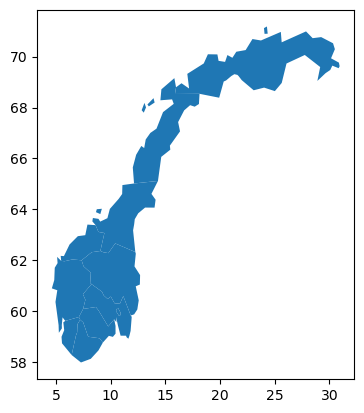

In [42]:
europe.plot()

In [43]:
europe_join_areas = europe.join(area_by_fylke, on='index')
europe_join_areas

,geometry,total_fylke_area
index,,
NO42,"POLYGON ((6.82600 59.04900, 6.93900 59.18200, ...",2.297323e+10
NO11,"MULTIPOLYGON (((5.55600 58.75100, 5.51200 59.0...",1.653218e+10
NO38,"POLYGON ((10.44700 59.43300, 10.44900 59.12900...",2.019927e+10
NO30,"POLYGON ((11.92700 59.79000, 11.82600 59.23800...",2.581037e+10
NO46,"POLYGON ((5.78700 61.97000, 6.50300 62.03900, ...",4.961032e+10
NO15,"POLYGON ((8.88900 63.11900, 9.43200 63.07700, ...",2.546814e+10
NO03,"POLYGON ((10.60100 60.13200, 10.68000 60.13400...",4.807548e+08
NO34,"POLYGON ((8.13200 61.11900, 8.18600 61.51400, ...",5.207245e+10
NO50,"MULTIPOLYGON (((10.41800 62.66900, 9.79200 62....",5.966697e+10


In [44]:
europe_join_areas=europe_join_areas.join(forest_to_area_by_fylke, on='index')
europe_join_areas

,geometry,total_fylke_area,forest_area_proportion
index,,,
NO42,"POLYGON ((6.82600 59.04900, 6.93900 59.18200, ...",2.297323e+10,0.456396
NO11,"MULTIPOLYGON (((5.55600 58.75100, 5.51200 59.0...",1.653218e+10,0.257466
NO38,"POLYGON ((10.44700 59.43300, 10.44900 59.12900...",2.019927e+10,0.575092
NO30,"POLYGON ((11.92700 59.79000, 11.82600 59.23800...",2.581037e+10,0.671340
NO46,"POLYGON ((5.78700 61.97000, 6.50300 62.03900, ...",4.961032e+10,0.228834
NO15,"POLYGON ((8.88900 63.11900, 9.43200 63.07700, ...",2.546814e+10,0.219766
NO03,"POLYGON ((10.60100 60.13200, 10.68000 60.13400...",4.807548e+08,0.622211
NO34,"POLYGON ((8.13200 61.11900, 8.18600 61.51400, ...",5.207245e+10,0.546463
NO50,"MULTIPOLYGON (((10.41800 62.66900, 9.79200 62....",5.966697e+10,0.311010


In [45]:
europe_join_areas=europe_join_areas.join(forest_to_landarea_by_fylke, on='index')
europe_join_areas

,geometry,total_fylke_area,forest_area_proportion,forest_landarea_proportion
index,,,,
NO42,"POLYGON ((6.82600 59.04900, 6.93900 59.18200, ...",2.297323e+10,0.456396,0.462611
NO11,"MULTIPOLYGON (((5.55600 58.75100, 5.51200 59.0...",1.653218e+10,0.257466,0.269752
NO38,"POLYGON ((10.44700 59.43300, 10.44900 59.12900...",2.019927e+10,0.575092,0.585787
NO30,"POLYGON ((11.92700 59.79000, 11.82600 59.23800...",2.581037e+10,0.671340,0.692719
NO46,"POLYGON ((5.78700 61.97000, 6.50300 62.03900, ...",4.961032e+10,0.228834,0.234149
NO15,"POLYGON ((8.88900 63.11900, 9.43200 63.07700, ...",2.546814e+10,0.219766,0.224314
NO03,"POLYGON ((10.60100 60.13200, 10.68000 60.13400...",4.807548e+08,0.622211,0.882317
NO34,"POLYGON ((8.13200 61.11900, 8.18600 61.51400, ...",5.207245e+10,0.546463,0.550388
NO50,"MULTIPOLYGON (((10.41800 62.66900, 9.79200 62....",5.966697e+10,0.311010,0.314106


In [46]:
europe2=europe
europe2 = europe2.to_crs(src.crs)
# Use zonal_stats to get area of selected codes within Norway's fylkes
stats = zonal_stats(europe2, selected_areas_mask.astype(int), affine=src.transform,
                    stats="sum",  # This counts the number of cells
                    nodata=0)
stats

[{'sum': 195933.0},
 {'sum': 285678.0},
 {'sum': 179544.0},
 {'sum': 240185.0},
 {'sum': 1431208.0},
 {'sum': 492905.0},
 {'sum': 1383.0},
 {'sum': 1226326.0},
 {'sum': 893698.0},
 {'sum': 1609161.0},
 {'sum': 3161376.0}]

In [47]:
stats

[{'sum': 195933.0},
 {'sum': 285678.0},
 {'sum': 179544.0},
 {'sum': 240185.0},
 {'sum': 1431208.0},
 {'sum': 492905.0},
 {'sum': 1383.0},
 {'sum': 1226326.0},
 {'sum': 893698.0},
 {'sum': 1609161.0},
 {'sum': 3161376.0}]

In [48]:
cell_area = src.res[0] * src.res[1]
#coverting pixels into area
europe_join_areas['selected_area_corine'] = [s['sum'] * cell_area for s in stats]
europe_join_areas

,geometry,total_fylke_area,forest_area_proportion,forest_landarea_proportion,selected_area_corine
index,,,,,
NO42,"POLYGON ((6.82600 59.04900, 6.93900 59.18200, ...",2.297323e+10,0.456396,0.462611,1.959330e+09
NO11,"MULTIPOLYGON (((5.55600 58.75100, 5.51200 59.0...",1.653218e+10,0.257466,0.269752,2.856780e+09
NO38,"POLYGON ((10.44700 59.43300, 10.44900 59.12900...",2.019927e+10,0.575092,0.585787,1.795440e+09
NO30,"POLYGON ((11.92700 59.79000, 11.82600 59.23800...",2.581037e+10,0.671340,0.692719,2.401850e+09
NO46,"POLYGON ((5.78700 61.97000, 6.50300 62.03900, ...",4.961032e+10,0.228834,0.234149,1.431208e+10
NO15,"POLYGON ((8.88900 63.11900, 9.43200 63.07700, ...",2.546814e+10,0.219766,0.224314,4.929050e+09
NO03,"POLYGON ((10.60100 60.13200, 10.68000 60.13400...",4.807548e+08,0.622211,0.882317,1.383000e+07
NO34,"POLYGON ((8.13200 61.11900, 8.18600 61.51400, ...",5.207245e+10,0.546463,0.550388,1.226326e+10
NO50,"MULTIPOLYGON (((10.41800 62.66900, 9.79200 62....",5.966697e+10,0.311010,0.314106,8.936980e+09


In [49]:
europe_join_areas['corine_areas_proportion']=europe_join_areas.selected_area_corine/europe_join_areas.total_fylke_area
europe_join_areas

,geometry,total_fylke_area,forest_area_proportion,forest_landarea_proportion,selected_area_corine,corine_areas_proportion
index,,,,,,
NO42,"POLYGON ((6.82600 59.04900, 6.93900 59.18200, ...",2.297323e+10,0.456396,0.462611,1.959330e+09,0.085288
NO11,"MULTIPOLYGON (((5.55600 58.75100, 5.51200 59.0...",1.653218e+10,0.257466,0.269752,2.856780e+09,0.172801
NO38,"POLYGON ((10.44700 59.43300, 10.44900 59.12900...",2.019927e+10,0.575092,0.585787,1.795440e+09,0.088886
NO30,"POLYGON ((11.92700 59.79000, 11.82600 59.23800...",2.581037e+10,0.671340,0.692719,2.401850e+09,0.093058
NO46,"POLYGON ((5.78700 61.97000, 6.50300 62.03900, ...",4.961032e+10,0.228834,0.234149,1.431208e+10,0.288490
NO15,"POLYGON ((8.88900 63.11900, 9.43200 63.07700, ...",2.546814e+10,0.219766,0.224314,4.929050e+09,0.193538
NO03,"POLYGON ((10.60100 60.13200, 10.68000 60.13400...",4.807548e+08,0.622211,0.882317,1.383000e+07,0.028767
NO34,"POLYGON ((8.13200 61.11900, 8.18600 61.51400, ...",5.207245e+10,0.546463,0.550388,1.226326e+10,0.235504
NO50,"MULTIPOLYGON (((10.41800 62.66900, 9.79200 62....",5.966697e+10,0.311010,0.314106,8.936980e+09,0.149781


In [50]:
# Workshop results
solar_wind_prop = [
    ['NO42',	0.267605590359067,	0.732394409640933],
    ['NO03',	0.101009832874318,  0.898990167125682],
    ['NO54',	0.707316378346426,  0.292683621653574],
    ['NO15',	0.656249714843643,  0.343750285156357],
    ['NO38',	0.337209124661951,  0.66279087533805],
    ['NO50',	0.720588401059573,  0.279411598940427],
    ['NO11',	0.517241509512329,  0.482758490487671],
    ['NO34',	0.189188495982038,  0.810811504017962],
    ['NO30',	0.114582667968501,  0.8854173320315],
    ['NO18',	0.676767207530057,  0.323232792469943],
    ['NO46',	0.638297641014171,  0.361702358985829],
]
    
new_columns = ['index', 'wind', 'solar']
df_solar_wind = pd.DataFrame(solar_wind_prop, columns=new_columns)
#df_solar_wind.set_index('index').astype(str)

In [ ]:
# highRES_base_case_optimization
solar_wind_prop_highRES = [
    ['NO03',	1.95272880304753E-08,	0.999999980472712],
    ['NO11',	0.220769679052069,	0.779230320947931],
    ['NO15',	0,   1],
    ['NO18',	0.708327226554015,	0.291672773445985],
    ['NO30',	0.999999834397755,	1.65602245202378E-07],
    ['NO34',	0.182625899818906,	0.817374100181094],
    ['NO38',	1.41715699329361E-09,	0.999999998582843],
    ['NO42',	0.817431574874105,	0.182568425125895],
    ['NO46',	0.372624645608662,	0.627375354391338],
    ['NO50',	0.99999999269399,	7.30600989082643E-09],
    ['NO54',	0.999999996536937,	3.4630633195575E-09],
]
solar_wind_prop_highRES
new_columns = ['index', 'wind', 'solar']
df_solar_wind_highRES = pd.DataFrame(solar_wind_prop_highRES, columns=new_columns).set_index('index')
df_solar_wind_highRES

In [51]:
df_solar_wind = df_solar_wind.set_index('index')
df_solar_wind

,wind,solar
index,,
NO42,0.267606,0.732394
NO03,0.101010,0.898990
NO54,0.707316,0.292684
NO15,0.656250,0.343750
NO38,0.337209,0.662791
NO50,0.720588,0.279412
NO11,0.517242,0.482758
NO34,0.189188,0.810812
NO30,0.114583,0.885417


In [52]:
europe_join_areas = europe_join_areas.join(df_solar_wind)
europe_join_areas

,geometry,total_fylke_area,forest_area_proportion,forest_landarea_proportion,selected_area_corine,corine_areas_proportion,wind,solar
index,,,,,,,,
NO42,"POLYGON ((6.82600 59.04900, 6.93900 59.18200, ...",2.297323e+10,0.456396,0.462611,1.959330e+09,0.085288,0.267606,0.732394
NO11,"MULTIPOLYGON (((5.55600 58.75100, 5.51200 59.0...",1.653218e+10,0.257466,0.269752,2.856780e+09,0.172801,0.517242,0.482758
NO38,"POLYGON ((10.44700 59.43300, 10.44900 59.12900...",2.019927e+10,0.575092,0.585787,1.795440e+09,0.088886,0.337209,0.662791
NO30,"POLYGON ((11.92700 59.79000, 11.82600 59.23800...",2.581037e+10,0.671340,0.692719,2.401850e+09,0.093058,0.114583,0.885417
NO46,"POLYGON ((5.78700 61.97000, 6.50300 62.03900, ...",4.961032e+10,0.228834,0.234149,1.431208e+10,0.288490,0.638298,0.361702
NO15,"POLYGON ((8.88900 63.11900, 9.43200 63.07700, ...",2.546814e+10,0.219766,0.224314,4.929050e+09,0.193538,0.656250,0.343750
NO03,"POLYGON ((10.60100 60.13200, 10.68000 60.13400...",4.807548e+08,0.622211,0.882317,1.383000e+07,0.028767,0.101010,0.898990
NO34,"POLYGON ((8.13200 61.11900, 8.18600 61.51400, ...",5.207245e+10,0.546463,0.550388,1.226326e+10,0.235504,0.189188,0.810812
NO50,"MULTIPOLYGON (((10.41800 62.66900, 9.79200 62....",5.966697e+10,0.311010,0.314106,8.936980e+09,0.149781,0.720588,0.279412


In [53]:
europe_join_areas = europe_join_areas.to_crs("EPSG:4326").assign(
        center = lambda x : x.geometry.centroid,
        x_coord = lambda x : x.centroid.x,
        y_coord = lambda x : x.centroid.y,
)
europe_join_areas

/tmp/ipykernel_773522/189811399.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = lambda x : x.geometry.centroid,
/tmp/ipykernel_773522/189811399.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_coord = lambda x : x.centroid.x,
/tmp/ipykernel_773522/189811399.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_coord = lambda x : x.centroid.y,


,geometry,total_fylke_area,forest_area_proportion,forest_landarea_proportion,selected_area_corine,corine_areas_proportion,wind,solar,center,x_coord,y_coord
index,,,,,,,,,,,
NO42,"POLYGON ((6.82600 59.04900, 6.93900 59.18200, ...",2.297323e+10,0.456396,0.462611,1.959330e+09,0.085288,0.267606,0.732394,POINT (7.66777 58.69972),7.667772,58.699718
NO11,"MULTIPOLYGON (((5.55600 58.75100, 5.51200 59.0...",1.653218e+10,0.257466,0.269752,2.856780e+09,0.172801,0.517242,0.482758,POINT (6.25497 59.13614),6.254969,59.136139
NO38,"POLYGON ((10.44700 59.43300, 10.44900 59.12900...",2.019927e+10,0.575092,0.585787,1.795440e+09,0.088886,0.337209,0.662791,POINT (8.73770 59.49112),8.737703,59.491118
NO30,"POLYGON ((11.92700 59.79000, 11.82600 59.23800...",2.581037e+10,0.671340,0.692719,2.401850e+09,0.093058,0.114583,0.885417,POINT (9.87374 60.07583),9.873744,60.075826
NO46,"POLYGON ((5.78700 61.97000, 6.50300 62.03900, ...",4.961032e+10,0.228834,0.234149,1.431208e+10,0.288490,0.638298,0.361702,POINT (6.33462 60.89720),6.334620,60.897201
NO15,"POLYGON ((8.88900 63.11900, 9.43200 63.07700, ...",2.546814e+10,0.219766,0.224314,4.929050e+09,0.193538,0.656250,0.343750,POINT (7.62646 62.61450),7.626461,62.614500
NO03,"POLYGON ((10.60100 60.13200, 10.68000 60.13400...",4.807548e+08,0.622211,0.882317,1.383000e+07,0.028767,0.101010,0.898990,POINT (10.71410 59.98099),10.714101,59.980995
NO34,"POLYGON ((8.13200 61.11900, 8.18600 61.51400, ...",5.207245e+10,0.546463,0.550388,1.226326e+10,0.235504,0.189188,0.810812,POINT (10.42612 61.42611),10.426124,61.426108
NO50,"MULTIPOLYGON (((10.41800 62.66900, 9.79200 62....",5.966697e+10,0.311010,0.314106,8.936980e+09,0.149781,0.720588,0.279412,POINT (11.34155 63.75513),11.341552,63.755127


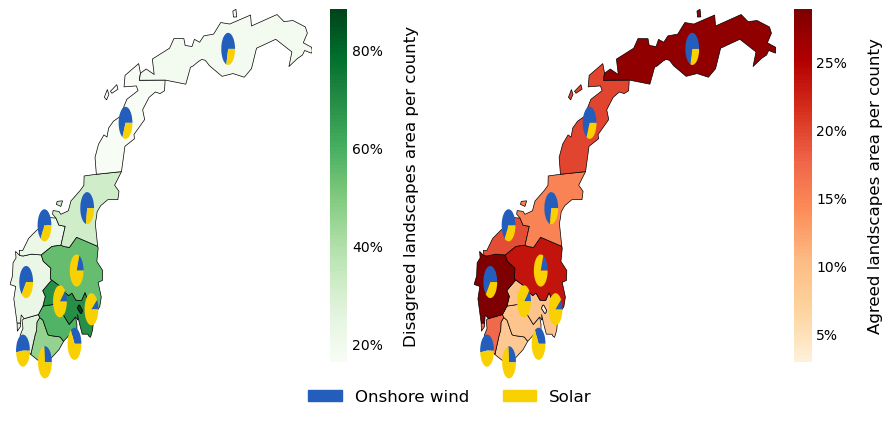

In [64]:

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

border_line_thickness = 0.5
forest_colors = ['#f7fcf5', '#e5f5e0', '#c7e9c0', '#a1d99b', '#74c476', '#41ab5d', '#238b45', '#006d2c', '#00441b']
corine_colors = ['#fef0d9', '#fdd49e', '#fdbb84', '#fc8d59', '#ef6548', '#d7301f', '#b30000', '#7f0000']

n_bins = 100
forest_cmap = LinearSegmentedColormap.from_list('custom_green', forest_colors, N=n_bins)
corine_cmap = LinearSegmentedColormap.from_list('custom_orange', corine_colors, N=n_bins)


pie_wind_color = '#235ebc'
pie_solar_color = '#f9d002'

# Function to create pie charts
def make_pie(sizes, colors, x, y, size, ax, zorder):
    wedges, _ = ax.pie(sizes, colors=colors, center=(x, y), radius=size, wedgeprops=dict(edgecolor='none'))
        # Set zorder for each wedge individually
    for wedge in wedges:
        wedge.set_zorder(zorder)   
    return wedges 


pie_offset = [
    ['NO42',	0,	-0.7],
    ['NO03',	1,	0],
    ['NO54',	0,   0],
    ['NO15',	0,	0.5],
    ['NO38',	1.5,	-0.8],
    ['NO50',	0.,	0],
    ['NO11',	-0.5,	-0.7],
    ['NO34',	0,	0],
    ['NO30',	-0.9,	0.2],
    ['NO18',	0,	0],
    ['NO46',	-0.3,	0.1],
]

# Adding pies to represent wind and solar installation proportions
#for idx, row in europe_fylke_join_SW_copy.iterrows():
def add_pies_to_axis(ax):
    for idx, x_offset, y_offset in pie_offset:
        row = europe_join_areas.loc[idx]
        wind_prop = row['wind']
        solar_prop = row['solar']
        x, y = row['x_coord']+x_offset, row['y_coord']+y_offset
        #x, y = add_offset(x, y)
        pie_sizes = [wind_prop, solar_prop]  # Make sure they add up to 1
        # Add a pie chart at the centroid location
        make_pie(pie_sizes, [pie_wind_color, pie_solar_color], x, y, 0.6, ax, zorder=4)   


#sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=europe_fylke_join_SW_copy['forest_prop'].min(), vmax=europe_fylke_join_SW_copy['forest_prop'].max()))

add_pies_to_axis(ax1)
europe_join_areas.plot(column='forest_landarea_proportion', cmap=forest_cmap, linewidth=border_line_thickness, ax=ax1, edgecolor='black')
F_sm = plt.cm.ScalarMappable(cmap=forest_cmap, norm=plt.Normalize(vmin=europe_join_areas['forest_landarea_proportion'].min(), vmax=europe_join_areas['forest_landarea_proportion'].max()))
cbar1 = fig.colorbar(F_sm, ax=ax1, orientation='vertical', fraction=0.05, pad=0.04)
cbar1.outline.set_visible(False)
cbar1.ax.tick_params(size=0)
cbar1.ax.tick_params(labelsize=10)
cbar1.set_label('Disagreed landscapes area per county', fontsize=12, labelpad=15)
#cbar1.set_ticks([0.2, 0.3, 0.4, 0.5, 0.6])
cbar1.set_ticks([0.2, 0.4, 0.6, 0.8])
cbar1.set_ticklabels(['20%', '40%', '60%', '80%'])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.axis('off')



add_pies_to_axis(ax2)
europe_join_areas.plot(column='corine_areas_proportion', cmap=corine_cmap, linewidth=border_line_thickness, ax=ax2, edgecolor='black')
C_sm = plt.cm.ScalarMappable(cmap=corine_cmap, norm=plt.Normalize(vmin=europe_join_areas['corine_areas_proportion'].min(), vmax=europe_join_areas['corine_areas_proportion'].max()))
cbar2 = fig.colorbar(C_sm, ax=ax2, orientation='vertical', fraction=0.05, pad=0.04)
cbar2.outline.set_visible(False)
cbar2.ax.tick_params(size=0)
cbar2.ax.tick_params(labelsize=10)
cbar2.set_label('Agreed landscapes area per county', fontsize=12, labelpad=15)
cbar2.set_ticks([0.05, 0.1, 0.15, 0.20, 0.25])
cbar2.set_ticklabels(['5%', '10%', '15%', '20%', '25%'])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.axis('off')



# Prepare patches for the legend
wind_patch = Patch(color=pie_wind_color, label='Onshore wind')
solar_patch = Patch(color=pie_solar_color, label='Solar')
#legend = fig.legend(handles=[wind_patch, solar_patch], fontsize=10, frameon=False, bbox_to_anchor=(0.3, 0.9))
legend = fig.legend(handles=[wind_patch, solar_patch], fontsize=12, loc='upper center', bbox_to_anchor=(0.55, 0.05), ncol=2, frameon=False)


 #Set the plot limits to focus on the relevant area
ax1.set_xlim(europe_join_areas.total_bounds[0], europe_join_areas.total_bounds[2])
ax1.set_ylim(europe_join_areas.total_bounds[1], europe_join_areas.total_bounds[3])

ax2.set_xlim(europe_join_areas.total_bounds[0], europe_join_areas.total_bounds[2])
ax2.set_ylim(europe_join_areas.total_bounds[1], europe_join_areas.total_bounds[3])

#ax.set_position(pos)
plt.tight_layout()
plt.subplots_adjust(bottom=0.08) 
plt.savefig('lanscapes_technology_correlation.png', dpi=300, transparent=True, bbox_inches='tight')
#plt.savefig('lanscapes_technology_correlation.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()

In [46]:
df_solar_wind_highRES.loc['NO42']

wind     1.952729e-08
solar    1.000000e+00
Name: NO42, dtype: float64

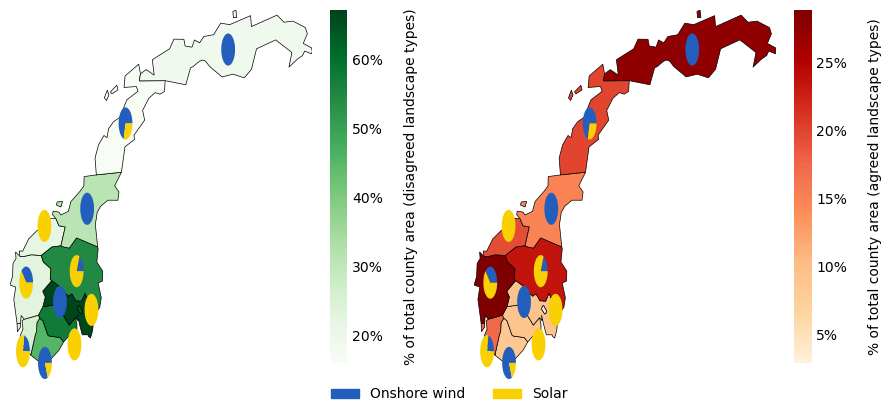

In [51]:

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

border_line_thickness = 0.5
forest_colors = ['#f7fcf5', '#e5f5e0', '#c7e9c0', '#a1d99b', '#74c476', '#41ab5d', '#238b45', '#006d2c', '#00441b']
corine_colors = ['#fef0d9', '#fdd49e', '#fdbb84', '#fc8d59', '#ef6548', '#d7301f', '#b30000', '#7f0000']

n_bins = 100
forest_cmap = LinearSegmentedColormap.from_list('custom_green', forest_colors, N=n_bins)
corine_cmap = LinearSegmentedColormap.from_list('custom_orange', corine_colors, N=n_bins)


pie_wind_color = '#235ebc'
pie_solar_color = '#f9d002'

# Function to create pie charts
def make_pie(sizes, colors, x, y, size, ax, zorder):
    wedges, _ = ax.pie(sizes, colors=colors, center=(x, y), radius=size, wedgeprops=dict(edgecolor='none'))
        # Set zorder for each wedge individually
    for wedge in wedges:
        wedge.set_zorder(zorder)   
    return wedges 


pie_offset = [
    ['NO42',	0,	-0.7],
    ['NO03',	1,	0],
    ['NO54',	0,   0],
    ['NO15',	0,	0.5],
    ['NO38',	1.5,	-0.8],
    ['NO50',	0.,	0],
    ['NO11',	-0.5,	-0.7],
    ['NO34',	0,	0],
    ['NO30',	-0.9,	0.2],
    ['NO18',	0,	0],
    ['NO46',	-0.3,	0.1],
]

# Adding pies to represent wind and solar installation proportions
#for idx, row in europe_fylke_join_SW_copy.iterrows():
def add_pies_to_axis(ax):
    for idx, x_offset, y_offset in pie_offset:
        row = europe_join_areas.loc[idx]
        highRES = df_solar_wind_highRES.loc[idx]
        wind_prop = highRES['wind']
        solar_prop = highRES['solar']
        x, y = row['x_coord']+x_offset, row['y_coord']+y_offset
        #x, y = add_offset(x, y)
        pie_sizes = [wind_prop, solar_prop]  # Make sure they add up to 1
        # Add a pie chart at the centroid location
        make_pie(pie_sizes, [pie_wind_color, pie_solar_color], x, y, 0.6, ax, zorder=4)   


#sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=europe_fylke_join_SW_copy['forest_prop'].min(), vmax=europe_fylke_join_SW_copy['forest_prop'].max()))

add_pies_to_axis(ax1)
europe_join_areas.plot(column='forest_area_proportion', cmap=forest_cmap, linewidth=border_line_thickness, ax=ax1, edgecolor='black')
F_sm = plt.cm.ScalarMappable(cmap=forest_cmap, norm=plt.Normalize(vmin=europe_join_areas['forest_area_proportion'].min(), vmax=europe_join_areas['forest_area_proportion'].max()))
cbar1 = fig.colorbar(F_sm, ax=ax1, orientation='vertical', fraction=0.05, pad=0.04)
cbar1.outline.set_visible(False)
cbar1.ax.tick_params(size=0)
cbar1.ax.tick_params(labelsize=10)
cbar1.set_label('% of total county area (disagreed landscape types)', fontsize=10, labelpad=15)
cbar1.set_ticks([0.2, 0.3, 0.4, 0.5, 0.6])
cbar1.set_ticklabels(['20%', '30%', '40%', '50%', '60%'])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.axis('off')



add_pies_to_axis(ax2)
europe_join_areas.plot(column='corine_areas_proportion', cmap=corine_cmap, linewidth=border_line_thickness, ax=ax2, edgecolor='black')
C_sm = plt.cm.ScalarMappable(cmap=corine_cmap, norm=plt.Normalize(vmin=europe_join_areas['corine_areas_proportion'].min(), vmax=europe_join_areas['corine_areas_proportion'].max()))
cbar2 = fig.colorbar(C_sm, ax=ax2, orientation='vertical', fraction=0.05, pad=0.04)
cbar2.outline.set_visible(False)
cbar2.ax.tick_params(size=0)
cbar2.ax.tick_params(labelsize=10)
cbar2.set_label('% of total county area (agreed landscape types)', fontsize=10, labelpad=15)
cbar2.set_ticks([0.05, 0.1, 0.15, 0.20, 0.25])
cbar2.set_ticklabels(['5%', '10%', '15%', '20%', '25%'])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.axis('off')



# Prepare patches for the legend
wind_patch = Patch(color=pie_wind_color, label='Onshore wind')
solar_patch = Patch(color=pie_solar_color, label='Solar')
#legend = fig.legend(handles=[wind_patch, solar_patch], fontsize=10, frameon=False, bbox_to_anchor=(0.3, 0.9))
legend = fig.legend(handles=[wind_patch, solar_patch], fontsize=10, loc='upper center', bbox_to_anchor=(0.55, 0.05), ncol=2, frameon=False)


 #Set the plot limits to focus on the relevant area
ax1.set_xlim(europe_join_areas.total_bounds[0], europe_join_areas.total_bounds[2])
ax1.set_ylim(europe_join_areas.total_bounds[1], europe_join_areas.total_bounds[3])

ax2.set_xlim(europe_join_areas.total_bounds[0], europe_join_areas.total_bounds[2])
ax2.set_ylim(europe_join_areas.total_bounds[1], europe_join_areas.total_bounds[3])

#ax.set_position(pos)
plt.tight_layout()
plt.subplots_adjust(bottom=0.08) 
plt.savefig('lanscapes_technology_correlation_OPT.png', dpi=300, bbox_inches='tight')
#plt.savefig('lanscapes_technology_correlation.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Correlation of county-wise technology preferences with landscape preferences

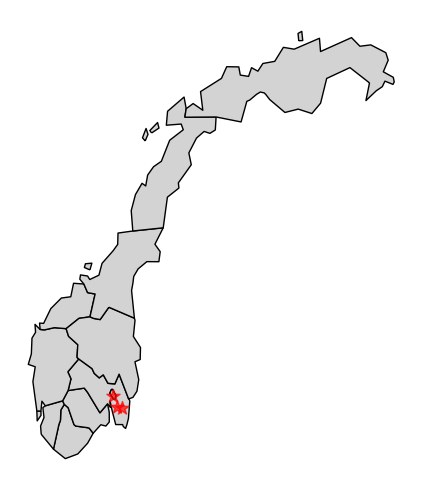

In [39]:
#workshops_locations
#IB = 59.94226, 10.73338
#Mysen = 59.55, 11.33
#askim: 59.6, 11.1

schools_data = {
    'School': ['Oslo', 'Mysen', 'Askim'],
    'Longitude': [10.73, 11.33, 11],
    'Latitude': [59.94226, 59.55, 59.6]
}
schools_df = pd.DataFrame(schools_data)
fig, ax = plt.subplots(figsize=(5, 5))
europe.plot(ax=ax, color='lightgrey', edgecolor='black')

schools_df.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', 
                color='red', marker='*', s=100, alpha=0.7)

# Plot school locations with custom location pin markers
#for _, row in schools_df.iterrows():
#    ax.annotate(row['School'], (row['Longitude'], row['Latitude']), 
                #xytext=(0, -15), textcoords='offset points', fontsize=8,
                #ha='center', va='top',
                #bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
#               )
    
    # Add text labels for each school
    #ax.annotate(row['School'], (row['Longitude'], row['Latitude']), 
    #            xytext=(5, 5), textcoords='offset points', fontsize=8,
    #            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
ax.axis('off')
plt.tight_layout()
plt.savefig('workshop_locations.png', dpi=300, bbox_inches='tight')



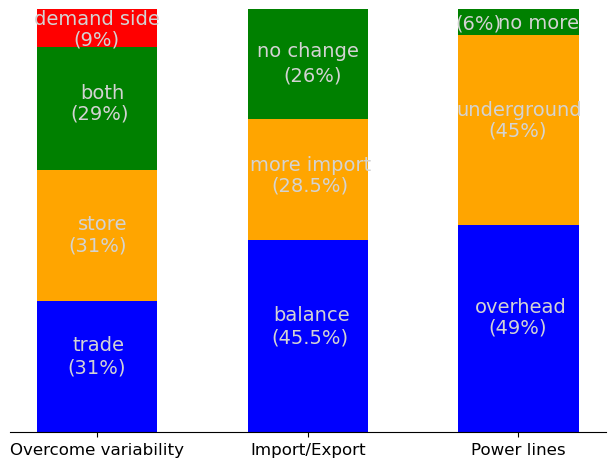

In [152]:
#correlation of questions: solar/wind variability, import/export, transmission

#variability = [31, 31, 29, 9]  # sum should be 100% [trade, store, both, demand_response]
#imp_export = [45.5, 28.5, 26]  # sum should be 100% [balanced, more import, same as today]
#power_lines = [49, 45, 6]  # sum should be 100% [over, under, no_more]

Ast =[31, 45.5, 49]
Bst =[31, 28.5, 45]
Cst=[29, 26, 6]
Dst= [9, np.nan, np.nan]

AAst =[31, 45.5, 49]
BBst =[62, 74, 94]
CCst=[91, 100, 100]
DDst= [100, np.nan, np.nan]


bar1_label = ['trade', 'balance', 'overhead', 'demand response']
bar2_label = ['store', 'more import', 'underground']
bar3_label = ['both', 'no change', 'no more']
bar4_label = ['demand side', '', '']



colors = ['blue', 'orange', 'green', 'red']

N = 3
barWidth = 0.2
ind = [0, 0.35, 0.7]

#postion_x = [0, 2, 4]

fig, ax = plt.subplots()

bars1 = ax.bar(ind, Ast, color=colors[0], edgecolor='none', width=barWidth)
bars2 = ax.bar(ind, Bst, color=colors[1], edgecolor='none', width=barWidth, bottom=AAst,)
bars3 = ax.bar(ind, Cst, color=colors[2], edgecolor='none', width=barWidth, bottom=BBst,)
bars4 = ax.bar(ind, Dst, color=colors[3], edgecolor='none', width=barWidth, bottom=CCst,)

# lightgrey versus Black
ax.text(0-0.05, AAst[0]/2-1.5, f'({AAst[0]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.045, AAst[0]/2+3, bar1_label[0], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.29, AAst[1]/2-1.5, f'({AAst[1]:.1f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.42, AAst[0]/2+10, bar1_label[1], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.65, AAst[2]/2-1, f'({AAst[2]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.78, AAst[2]/2+3, bar1_label[2], ha='right', va='bottom', fontsize=14, color='#D3D3D3')

ax.text(0-0.048, BBst[0]-19, f'({Bst[0]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.05, BBst[0]-15, bar2_label[0], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.29, BBst[1]-17, f'({Bst[1]:.1f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.455, BBst[1]-13, bar2_label[1], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.65, BBst[2]-24, f'({Bst[2]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.805, BBst[2]-20, bar2_label[2], ha='right', va='bottom', fontsize=14, color='#D3D3D3')

ax.text(0-0.045, CCst[0]-17, f'({Cst[0]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.045, CCst[0]-13, bar3_label[0], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.31, CCst[1]-17, f'({Cst[1]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.435, CCst[1]-12, bar3_label[1], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.595, CCst[2]-4.5, f'({Cst[2]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.8015, CCst[2]-5.5, bar3_label[2], ha='right', va='bottom', fontsize=14, color='#D3D3D3')

ax.text(0-0.04, DDst[0]-8.5, f'({Dst[0]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.1045, DDst[0]-4.5, bar4_label[0], ha='right', va='bottom', fontsize=14, color='#D3D3D3')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, right=False, top=False)
ax.set_yticks([])

ax.set_xticks(ind)
ax.set_xticklabels(['Overcome variability', 'Import/Export', 'Power lines'], fontsize=12)

plt.tight_layout()
#plt.savefig('variaability_import_transimission_Black.png', dpi=300, bbox_inches='tight')

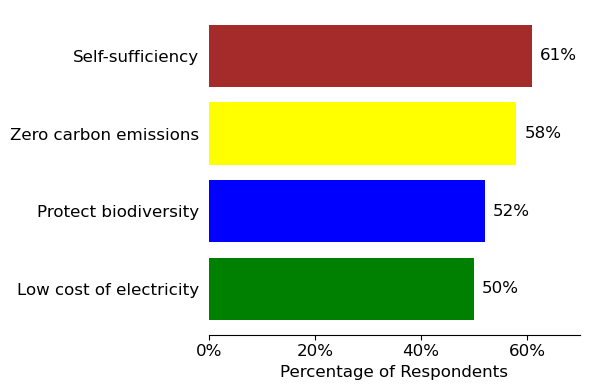

In [119]:
# What is the most important when producing electricity

options = [
    "Self-sufficiency",
    "Zero carbon emissions",
    "Protect biodiversity",
    "Low cost of electricity"
    
]
respondents = [61, 58, 52, 50]  # Replace with your actual data


# Sort the data
sorted_idx = sorted(range(len(respondents)), key=lambda i: respondents[i])
options = [options[i] for i in sorted_idx]
respondents = [respondents[i] for i in sorted_idx]


# Create a horizontal bar chart
plt.figure(figsize=(6, 4))
bars = plt.barh(options, respondents, color=['green', 'blue', 'yellow', 'brown'])
plt.xlabel('Percentage of Respondents', fontsize=12)
#plt.title('Most important factors in electricity production')

# Set the limit for the x-axis from 0 to 100
plt.xlim(0, 70)
tick_positions = range(0, 70, 20)
tick_labels = [f'{i}%' for i in tick_positions]
plt.xticks(tick_positions, tick_labels, fontsize=12)
plt.yticks(fontsize=12)

for bar in bars:
    plt.text(bar.get_width() + 1.5, bar.get_y() + bar.get_height()/2, f'{bar.get_width()}%', va='center', fontsize=12)



plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, right=False, top=False)


# Show the plot
plt.tight_layout()
#plt.savefig('imp_to_produce_electricity.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
# Imp_to_produce_electricity could be placed with words figure as both shows less concerened about cost and more about nature

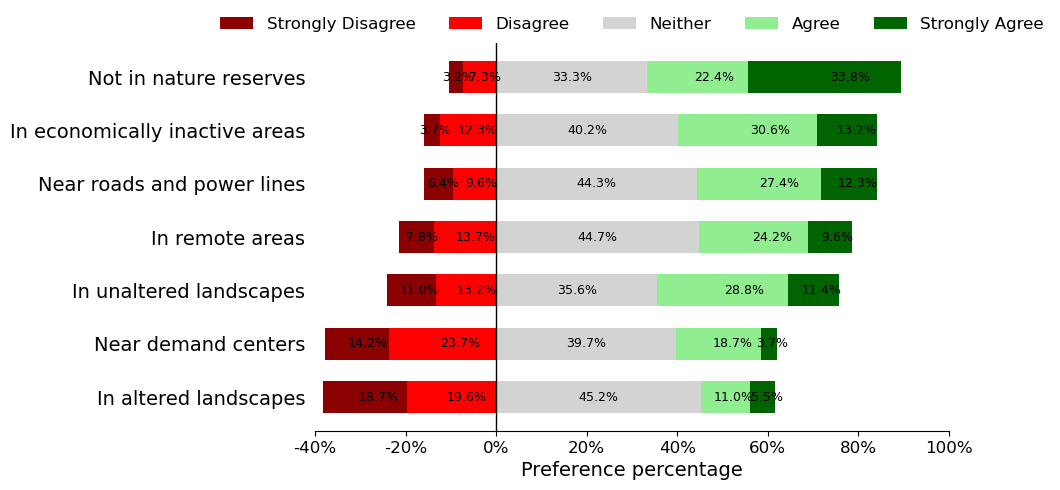

In [123]:

# Sample survey responses
#data = {
#    'Strongly Disagree': [7, 8, 31, 14, 17, 41, 24],
 #   'Disagree': [14, 29, 51, 22, 31, 42, 29],
  #  'Neither': [75, 86, 88, 98, 97, 98, 78],
   # 'Agree': [49, 70, 39, 60, 52, 24, 63],
    #'Strongly Agree': [74, 26, 10, 25, 22, 14, 25]
#}



data = {
    'Strongly Disagree': [41, 31, 24, 17, 14, 8, 7],
    'Disagree': [43, 52, 29, 30, 21, 27, 16],
    'Neither': [99, 87, 78, 98, 97, 88, 73],
    'Agree': [24, 41, 63, 53, 60, 67, 49],
    'Strongly Agree': [12, 8, 25, 21, 27, 29, 74]
}

y_labels = ['In altered landscapes', 'Near demand centers', 'In unaltered landscapes',
               'In remote areas', 'Near roads and power lines', 'In economically inactive areas',
                   'Not in nature reserves']



# Convert the dictionary to a DataFrame and normalize the data to get percentages
df = pd.DataFrame(data)
df_percent = df.divide(df.sum(axis=1), axis=0)*100

# Define the midpoint for the neutral category (this will be our center for the diverging bars)
midpoint = df_percent['Neither']

# Define the order from the 'Strongly Disagree' to 'Strongly Agree'
order = ['Strongly Disagree', 'Disagree', 'Neither', 'Agree', 'Strongly Agree']

# Start plotting
fig, ax = plt.subplots(figsize=(10, 5))

# Initialize the left counter - will be used to keep track of where to start the left-most segment
#left_counter = midpoint
#print(left_counter)

# Define colors for each category
category_colors = {
    'Strongly Disagree': 'darkred',
    'Disagree': 'red',
    'Neither': 'lightgrey',
    'Agree': 'lightgreen',
    'Strongly Agree': 'darkgreen'
}

left = df_percent[['Strongly Disagree', 'Disagree']].sum(axis=1) * -1
#print(left)

# Plot each segment of the bars
for category in order:
    width = df_percent[category].values
    if category in ['Strongly Disagree', 'Disagree']:
        ax.barh(df_percent.index, width, left=left, height=0.6, color=category_colors[category], label=category)
        left += width
    elif category == 'Neither':
        ax.barh(df_percent.index, width, left=left, height=0.6, color=category_colors[category], label=category)
        left += width
    else:
        ax.barh(df_percent.index, width, left=left, height=0.6, color=category_colors[category], label=category)
        left += width



ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels, fontsize=14)




ax.set_xlim(-40, 100)
tick_values = list(range(-40, 101, 20))
ax.set_xticks(tick_values)
ax.set_xticklabels([f'{x}%' for x in tick_values], fontsize=12)
ax.axvline(0, color='black', lw=1)
ax.set_xlabel('Preference percentage', fontsize=14)


# Add percentage labels
for i, (index, row) in enumerate(df_percent.iterrows()):
    cumulative = -row[['Strongly Disagree', 'Disagree']].sum()
    for category in order:
        value = row[category]
        if category in ['Strongly Disagree', 'Disagree']:
            x = cumulative + value/1.5
            ax.text(x, i, f'{value:.1f}%', va='center', ha='center', fontsize=9, color='black')
            cumulative += value
        elif category == 'Neither':
            ax.text(0+value/2, i, f'{value:.1f}%', va='center', ha='center', fontsize=9)
            cumulative += value
        else:
            x = cumulative + value / 1.5
            ax.text(x, i, f'{value:.1f}%', va='center', ha='center', fontsize=9, color='black')
            cumulative += value

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(left=False, right=False, top=False)
ax.legend(ncol=len(category_colors), bbox_to_anchor=(0.5, 1.05), loc='center', frameon=False, fontsize=12)

plt.tight_layout()
plt.savefig('agree_disagree_wind_placing.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()


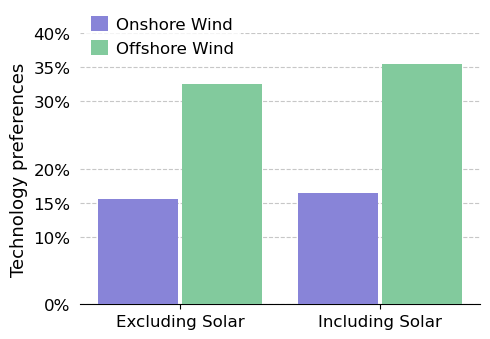

In [87]:
#Grouped bar chart of technology preference

#onshore_wind = [24.5, 20]
#offshore_wind = [26.5, 29]

# Create the data
data = {
    'Scenario': ['Excluding Solar', 'Including Solar'],
    'Onshore Wind': [15.5, 16.5],
    'Offshore Wind': [32.5, 35.5]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(5, 3.5))

# Set the width of each bar and the positions of the bars
width = 0.4
x = np.arange(len(df['Scenario']))

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=0)

# Create the bars with a small gap between groups
ax.bar(x - width/2 - 0.01, df['Onshore Wind'], width, label='Onshore Wind', color='#8884d8', zorder=3)
ax.bar(x + width/2 + 0.01, df['Offshore Wind'], width, label='Offshore Wind', color='#82ca9d', zorder=3)

# Customize the plot
ax.set_ylabel('Technology preferences', fontsize=13)
#ax.set_title('Wind Capacity Installation')
ax.set_xticks(x)
ax.set_xticklabels(df['Scenario'], fontsize=12)

custom_ticks = [0, 10, 15, 20, 30, 35, 40]
ax.set_yticks(custom_ticks)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.0f}%"))
ax.set_ylim(0, 40)
plt.yticks(fontsize=12)


# Adjust legend: remove border, make markers square and smaller, move to left
legend = ax.legend(loc='center left', borderaxespad=0, 
                   bbox_to_anchor=(0.01, 0.99), 
                   handlelength=1, handleheight=1, handletextpad=0.5, fontsize=12)
legend.get_frame().set_linewidth(0)  # Remove legend border


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(left=False, right=False, top=False)

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('technology_preferences.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

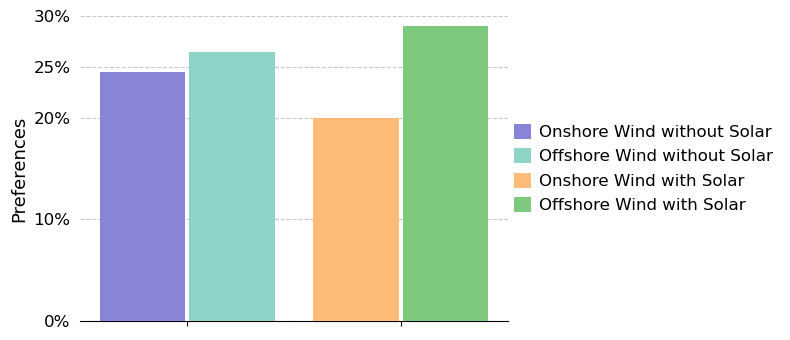

In [33]:
#Grouped bar chart of technology preference

#onshore_wind = [24.5, 20]
#offshore_wind = [26.5, 29]

# Create the data
data = {
    'Scenario': ['Excluding Solar', 'Including Solar'],
    'Onshore Wind': [24.5, 20],
    'Offshore Wind': [26.5, 29]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 3.5))

# Set the width of each bar and the positions of the bars
width = 0.4
x = np.arange(len(df['Scenario']))

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=0)

colors = ['#8884d8', '#8dd3c7', '#ffbb78', '#7fc97f']

ax.bar(x[0] - width/2 - 0.01, df.loc[0, 'Onshore Wind'], width, label='Onshore Wind without Solar', color=colors[0], zorder=3)
ax.bar(x[0] + width/2 + 0.01, df.loc[0, 'Offshore Wind'], width, label='Offshore Wind without Solar', color=colors[1], zorder=3)
ax.bar(x[1] - width/2 - 0.01, df.loc[1, 'Onshore Wind'] * 0 + 20, width, label='Onshore Wind with Solar', color=colors[2], zorder=3)
ax.bar(x[1] + width/2 + 0.01, df.loc[1, 'Offshore Wind'] * 0 + 29, width, label='Offshore Wind with Solar', color=colors[3], zorder=3)


# Customize the plot
ax.set_ylabel('Preferences', fontsize=13)
#ax.set_title('Wind Capacity Installation')
ax.set_xticks(x)
#ax.set_xticklabels(df['Scenario'], fontsize=12)
ax.set_xticklabels([])

custom_ticks = [0, 10, 20, 25, 30]
ax.set_yticks(custom_ticks)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.0f}%"))
ax.set_ylim(0, 30)
plt.yticks(fontsize=12)


# Adjust legend: remove border, make markers square and smaller, move to left
legend = ax.legend(loc='center left', borderaxespad=0, 
                   bbox_to_anchor=(1, 0.5), 
                   handlelength=1, handleheight=1, handletextpad=0.5, fontsize=12)
legend.get_frame().set_linewidth(0)  # Remove legend border


# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(left=False, right=False, top=False)

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('technology_preferences_IB.png', dpi=300, bbox_inches='tight')
plt.show()

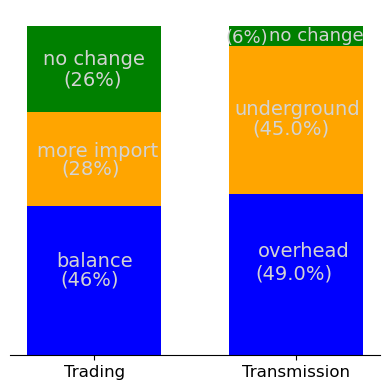

In [109]:
#For poster
#correlation of questions: solar/wind variability, import/export, transmission

#variability = [31, 31, 29, 9]  # sum should be 100% [trade, store, both, demand_response]
#imp_export = [45.5, 28.5, 26]  # sum should be 100% [balanced, more import, same as today]
#power_lines = [49, 45, 6]  # sum should be 100% [over, under, no_more]

Ast =[45.5, 49]
Bst =[28.5, 45]
Cst=[26, 6]
#Dst= [9, np.nan, np.nan]

AAst =[45.5, 49]
BBst =[74, 94]
CCst=[100, 100]
#DDst= [100, np.nan, np.nan]


bar1_label = ['balance', 'overhead']
bar2_label = ['more import', 'underground']
bar3_label = ['no change', 'no change']
#bar4_label = ['demand side', '', '']



colors = ['blue', 'orange', 'green', 'red']

N = 2
barWidth = 0.2
#ind = [0, 0.35, 0.7]
ind = [0, 0.3]


#postion_x = [0, 2, 4]

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

bars1 = ax.bar(ind, Ast, color=colors[0], edgecolor='none', width=barWidth)
bars2 = ax.bar(ind, Bst, color=colors[1], edgecolor='none', width=barWidth, bottom=AAst,)
bars3 = ax.bar(ind, Cst, color=colors[2], edgecolor='none', width=barWidth, bottom=BBst,)
#bars4 = ax.bar(ind, Dst, color=colors[3], edgecolor='none', width=barWidth, bottom=CCst,)

# lightgrey versus Black
ax.text(0-0.05, AAst[0]/2-1.5, f'({AAst[0]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.057, AAst[0]/2+3, bar1_label[0], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.24, AAst[1]/2-1.5, f'({AAst[1]:.1f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.38, AAst[0]/2+6, bar1_label[1], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
#ax.text(0+0.65, AAst[2]/2-1, f'({AAst[2]:.0f}%)', color='#D3D3D3', fontsize=14)
#ax.text(0+0.78, AAst[2]/2+3, bar1_label[2], ha='right', va='bottom', fontsize=14, color='#D3D3D3')

ax.text(0-0.048, BBst[0]-19, f'({Bst[0]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.095, BBst[0]-15, bar2_label[0], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.235, BBst[1]-27, f'({Bst[1]:.1f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.395, BBst[1]-22, bar2_label[1], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
#ax.text(0+0.65, BBst[2]-24, f'({Bst[2]:.0f}%)', color='#D3D3D3', fontsize=14)
#ax.text(0+0.805, BBst[2]-20, bar2_label[2], ha='right', va='bottom', fontsize=14, color='#D3D3D3')

ax.text(0-0.045, CCst[0]-18, f'({Cst[0]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.075, CCst[0]-13, bar3_label[0], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.196, CCst[1]-5, f'({Cst[1]:.0f}%)', color='#D3D3D3', fontsize=13)
ax.text(0+0.4, CCst[1]-5.5, bar3_label[1], ha='right', va='bottom', fontsize=13, color='#D3D3D3')
#ax.text(0+0.595, CCst[2]-4.5, f'({Cst[2]:.0f}%)', color='#D3D3D3', fontsize=14)
#ax.text(0+0.8015, CCst[2]-5.5, bar3_label[2], ha='right', va='bottom', fontsize=14, color='#D3D3D3')

#ax.text(0-0.04, DDst[0]-8.5, f'({Dst[0]:.0f}%)', color='#D3D3D3', fontsize=14)
#ax.text(0+0.1045, DDst[0]-4.5, bar4_label[0], ha='right', va='bottom', fontsize=14, color='#D3D3D3')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, right=False, top=False)
ax.set_yticks([])

ax.set_xticks(ind)
ax.set_xticklabels(['Trading', 'Transmission'], fontsize=12)

plt.tight_layout()
#plt.savefig('trade_transimission_Black.png', dpi=300, bbox_inches='tight')

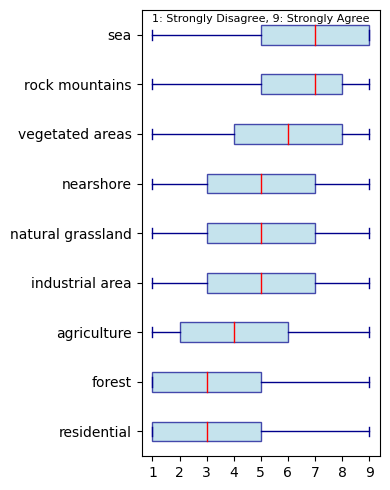

In [141]:
#
data = pd.read_csv('visuals.csv')
medians = data.median()
sorted_keys = medians.sort_values(ascending=True).index.tolist()
sorted_data = [data[col].tolist() for col in sorted_keys]

# Split into three groups: low, medium, high median values
num_categories = len(sorted_keys)
third_point = num_categories // 3

# Start from light gray and move to darker grays
gray_colors = [
    # Low median group (lightest gray)
    [0.9, 0.9, 0.9],  # Very light gray
    [0.8, 0.8, 0.8],
    [0.7, 0.7, 0.7],
    
    # Medium median group (medium grays)
    [0.6, 0.6, 0.6],
    [0.5, 0.5, 0.5],
    [0.4, 0.4, 0.4],
    
    # High median group (darker grays)
    [0.3, 0.3, 0.3],
    [0.2, 0.2, 0.2],
    [0.1, 0.1, 0.1]
]




plt.figure(figsize=(4, 5))

# Create horizontal boxplot with custom styling
boxplot = plt.boxplot(sorted_data, 
                      vert=False,  # horizontal orientation
                      patch_artist=True,  # fill boxes with color
                      widths=0.4,  # box width
                      medianprops={'color': 'red', 'linewidth': 1},  # median line style
                      boxprops={'facecolor': 'lightblue', 
                                'edgecolor': 'darkblue', 
                                'alpha': 0.7},  # box fill and edge
                      whiskerprops={'color': 'darkblue'},
                      capprops={'color': 'darkblue'},
                      flierprops={'marker': 'o', 
                                  'markerfacecolor': 'red', 
                                  'markersize': 5,
                                  'markeredgecolor': 'red'},)
                     #boxline=False)


# Customize the plot

plt.text(0.5, 0.98, '1: Strongly Disagree, 9: Strongly Agree', 
         horizontalalignment='center', 
         verticalalignment='center', 
         transform=plt.gca().transAxes,
         fontsize=8)
plt.xticks(range(1, 10))

#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)


#plt.title('Perception of Different Land Use Types\n(1: Strongly Disagree, 9: Strongly Agree)', fontsize=14)

plt.yticks(range(1, len(sorted_keys) + 1), sorted_keys, fontsize=10)
#plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [119]:
sorted_keys

['rock mountains',
 'sea',
 'vegetated areas',
 'industrial area',
 'natural grassland',
 'nearshore',
 'agriculture',
 'residential',
 'forest']

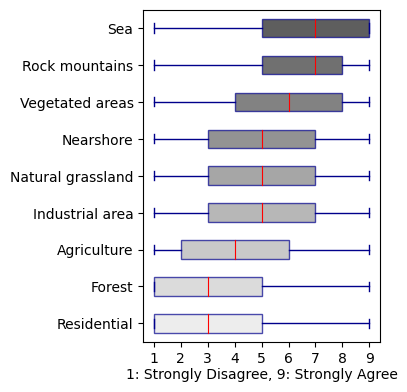

In [315]:
#
data = pd.read_csv('visuals.csv')
medians = data.median()
sorted_keys = medians.sort_values(ascending=True).index.tolist()
sorted_data = [data[col].tolist() for col in sorted_keys]

# Split into three groups: low, medium, high median values
num_categories = len(sorted_keys)
third_point = num_categories // 3

gray_colors = [
    # Light to dark grays
    [0.9, 0.9, 0.9],  # Lightest gray
    [0.8, 0.8, 0.8],
    [0.7, 0.7, 0.7],
    [0.6, 0.6, 0.6],
    [0.5, 0.5, 0.5],
    [0.4, 0.4, 0.4],
    [0.3, 0.3, 0.3],
    [0.2, 0.2, 0.2],
    [0.1, 0.1, 0.1]  # Darkest gray
]




plt.figure(figsize=(4, 4))

# Create horizontal boxplot with custom styling
boxes = plt.boxplot(sorted_data, 
                      vert=False,  # horizontal orientation
                      patch_artist=True,  # fill boxes with color
                      widths=0.5,  # box width
                      medianprops={'color': 'red', 'linewidth': 0.8},  # median line style
                      whiskerprops={'color': 'darkblue'},
                      capprops={'color': 'darkblue'},
                      flierprops={'marker': 'o', 
                                  'markerfacecolor': 'red', 
                                  'markersize': 5,
                                  'markeredgecolor': 'red'},)
                     #boxline=False)

# Customize box colors
for patch, color in zip(boxes['boxes'], gray_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('darkblue')
# Customize the plot

plt.text(0.5, -0.1, '1: Strongly Disagree, 9: Strongly Agree', 
         horizontalalignment='center', 
         verticalalignment='center', 
         transform=plt.gca().transAxes,
         fontsize=10)
plt.xticks(range(1, 10), fontsize=10)

#plt.yticks(range(1, len(sorted_keys) + 1), sorted_keys, fontsize=9)
plt.yticks(range(1, len(sorted_keys) + 1), [label.capitalize() for label in sorted_keys], fontsize=10)

# Adjust layout and display
plt.tight_layout()

plt.savefig('landscape_preference_Transperent.png', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

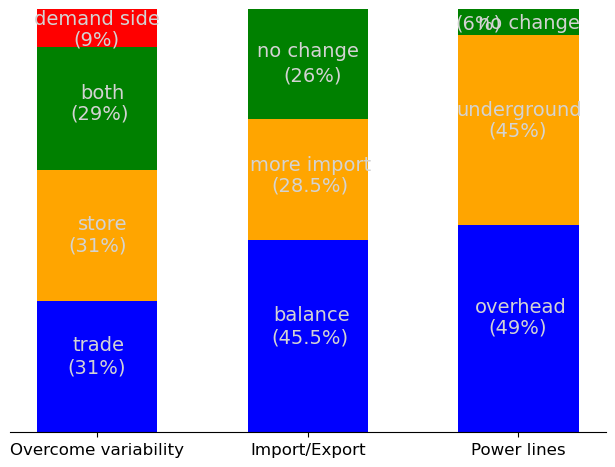

In [155]:
#correlation of questions: solar/wind variability, import/export, transmission

#variability = [31, 31, 29, 9]  # sum should be 100% [trade, store, both, demand_response]
#imp_export = [45.5, 28.5, 26]  # sum should be 100% [balanced, more import, same as today]
#power_lines = [49, 45, 6]  # sum should be 100% [over, under, no_more]

Ast =[31, 45.5, 49]
Bst =[31, 28.5, 45]
Cst=[29, 26, 6]
Dst= [9, np.nan, np.nan]

AAst =[31, 45.5, 49]
BBst =[62, 74, 94]
CCst=[91, 100, 100]
DDst= [100, np.nan, np.nan]


bar1_label = ['trade', 'balance', 'overhead', 'demand response']
bar2_label = ['store', 'more import', 'underground']
bar3_label = ['both', 'no change', 'no change']
bar4_label = ['demand side', '', '']



colors = ['blue', 'orange', 'green', 'red']

N = 3
barWidth = 0.2
ind = [0, 0.35, 0.7]

#postion_x = [0, 2, 4]

fig, ax = plt.subplots()

bars1 = ax.bar(ind, Ast, color=colors[0], edgecolor='none', width=barWidth)
bars2 = ax.bar(ind, Bst, color=colors[1], edgecolor='none', width=barWidth, bottom=AAst,)
bars3 = ax.bar(ind, Cst, color=colors[2], edgecolor='none', width=barWidth, bottom=BBst,)
bars4 = ax.bar(ind, Dst, color=colors[3], edgecolor='none', width=barWidth, bottom=CCst,)

# lightgrey versus Black
ax.text(0-0.05, AAst[0]/2-1.5, f'({AAst[0]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.045, AAst[0]/2+3, bar1_label[0], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.29, AAst[1]/2-1.5, f'({AAst[1]:.1f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.42, AAst[0]/2+10, bar1_label[1], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.65, AAst[2]/2-1, f'({AAst[2]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.78, AAst[2]/2+3, bar1_label[2], ha='right', va='bottom', fontsize=14, color='#D3D3D3')

ax.text(0-0.048, BBst[0]-19, f'({Bst[0]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.05, BBst[0]-15, bar2_label[0], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.29, BBst[1]-17, f'({Bst[1]:.1f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.455, BBst[1]-13, bar2_label[1], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.65, BBst[2]-24, f'({Bst[2]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.805, BBst[2]-20, bar2_label[2], ha='right', va='bottom', fontsize=14, color='#D3D3D3')

ax.text(0-0.045, CCst[0]-17, f'({Cst[0]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.045, CCst[0]-13, bar3_label[0], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.31, CCst[1]-17, f'({Cst[1]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.435, CCst[1]-12, bar3_label[1], ha='right', va='bottom', fontsize=14, color='#D3D3D3')
ax.text(0+0.595, CCst[2]-4.5, f'({Cst[2]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.8015, CCst[2]-5.5, bar3_label[2], ha='right', va='bottom', fontsize=14, color='#D3D3D3')

ax.text(0-0.04, DDst[0]-8.5, f'({Dst[0]:.0f}%)', color='#D3D3D3', fontsize=14)
ax.text(0+0.1045, DDst[0]-4.5, bar4_label[0], ha='right', va='bottom', fontsize=14, color='#D3D3D3')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, right=False, top=False)
ax.set_yticks([])

ax.set_xticks(ind)
ax.set_xticklabels(['Overcome variability', 'Import/Export', 'Power lines'], fontsize=12)

plt.tight_layout()
#plt.savefig('variaability_import_transimission_Black.png', dpi=300, bbox_inches='tight')

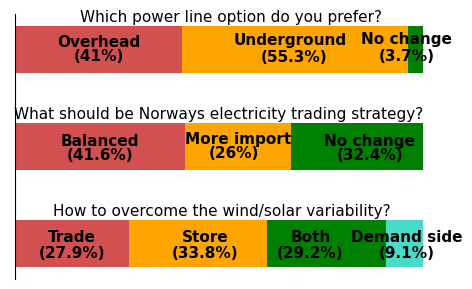

In [102]:
#With the latest results
Ast =[27.9, 41.6, 41]
Bst =[33.8, 26, 55.3]
Cst=[29.2, 32.4, 3.7]
Dst= [9.1, np.nan, np.nan]

AAst =[27.9, 41.6, 41]
BBst =[61.7, 67.6, 96.3]
CCst=[90.9, 100, 100]
DDst= [100, np.nan, np.nan]


bar1_label = ['Trade', 'Balanced', 'Overhead']
bar2_label = ['Store', 'More import', 'Underground']
bar3_label = ['Both', 'No change', 'No change']
bar4_label = ['Demand side', '', '']



colors = ['#d35050', 'orange', 'green', '#4adbc8']

fig, ax = plt.subplots(figsize=(5, 3))  # Adjusted figure size for horizontal bars

barWidth=0.17
ind = [0, 0.35, 0.7]

# Create horizontal bars
bars1 = ax.barh(ind, Ast, color=colors[0], edgecolor='none', height=barWidth)
bars2 = ax.barh(ind, Bst, color=colors[1], edgecolor='none', height=barWidth, left=AAst)
bars3 = ax.barh(ind, Cst, color=colors[2], edgecolor='none', height=barWidth, left=BBst)
bars4 = ax.barh(ind, Dst, color=colors[3], edgecolor='none', height=barWidth, left=CCst)

# Adjust text positioning for horizontal bars
# First bar (trade/demand response)
ax.text(AAst[0]/2, 0-0.035, f'({AAst[0]:.1f}%)', color='black', fontsize=11, rotation=0, ha='center', va='center', fontweight='bold')
ax.text(AAst[0]/2, 0+0.025, bar1_label[0], fontsize=11, color='black', rotation=0, ha='center',va='center', fontweight='bold')

ax.text(AAst[1]/2, 0+0.32, f'({AAst[1]:.1f}%)', color='black', fontsize=11, rotation=0, ha='center',va='center', fontweight='bold')
ax.text(AAst[0]/2+7, 0+0.37, bar1_label[1], fontsize=11, color='black', rotation=0, ha='center',va='center', fontweight='bold')

ax.text(AAst[2]/2, 0+0.68, f'({AAst[2]:.0f}%)', color='black', fontsize=11, rotation=0, ha='center', va='center', fontweight='bold')
ax.text(AAst[2]/2, 0+0.73, bar1_label[2], fontsize=11, color='black', rotation=0, ha='center', va='center', fontweight='bold')


ax.text(BBst[0]-15, 0-0.035, f'({Bst[0]:.1f}%)', color='black', fontsize=11, rotation=0, ha='center', va='center', fontweight='bold')
ax.text(BBst[0]-15, 0+0.025, bar2_label[0], fontsize=11, color='black', rotation=0, ha='center', va='center', fontweight='bold')
ax.text(BBst[1]-20, 0+0.31, f'({Bst[1]:.0f}%)', color='black', fontsize=11, fontweight='bold')
ax.text(BBst[1]-13, 0+0.38, bar2_label[1], ha='center', va='center', fontsize=11, color='black', fontweight='bold')
ax.text(BBst[2]-36, 0+0.66, f'({Bst[2]:.1f}%)', color='black', fontsize=11, fontweight='bold')
ax.text(BBst[2]-15, 0+0.71, bar2_label[2], ha='right', va='bottom', fontsize=11, color='black', fontweight='bold')

ax.text(CCst[0]/2+27, 0-0.035, f'({Cst[0]:.1f}%)', color='black', fontsize=11, ha='center', va='center', fontweight='bold')
ax.text(CCst[0]/2+27, 0+0.025, bar3_label[0], fontsize=11, color='black', ha='center', va='center', fontweight='bold')
ax.text(CCst[1]/2+37, 0+0.32, f'({Cst[1]:.1f}%)', color='black', fontsize=11, ha='center', va='center', fontweight='bold')
ax.text( CCst[1]/2+37, 0+0.37, bar3_label[1], fontsize=11, color='black', ha='center', va='center', fontweight='bold')
ax.text( CCst[2]/2+46, 0+0.68, f'({Cst[2]:.1f}%)', color='black', fontsize=11, ha='center', va='center', fontweight='bold')
ax.text( CCst[2]/2+46, 0+0.74, bar3_label[2], fontsize=11, color='black', ha='center', va='center', fontweight='bold')

ax.text(DDst[0]/2+46, 0-0.035,  f'({Dst[0]:.1f}%)', color='black', fontsize=11, ha='center', va='center', fontweight='bold')
ax.text(DDst[0]/2+46, 0+0.025,  bar4_label[0], fontsize=11, color='black', ha='center', va='center', fontweight='bold')



# Remove spines and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, top=False, right=False)

# Set y-ticks and x-ticks
ax.set_yticks([])
#ax.set_yticklabels([''], fontsize=12)
ax.set_xticks([])

ax.text(92, 0.12, 'How to overcome the wind/solar variability?', fontsize=11, va='center', ha='right')
ax.text(100, 0.47, 'What should be Norways electricity trading strategy?', fontsize=11, va='center', ha='right')
ax.text(90, 0.82, 'Which power line option do you prefer?', fontsize=11, va='center', ha='right')


plt.tight_layout()
#plt.savefig('variability_import_transmission_horizontal_transparentBold.png', dpi=300, transparent=True, bbox_inches='tight')